In [359]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [360]:
height = ["IMU_ATTI(0):alti:D", "IMU_ATTI(0):relativeHeight:C"]
rpy = ["IMU_ATTI(0):roll:C", "IMU_ATTI(0):pitch:C", "IMU_ATTI(0):yaw:C"]
wind = ["AirSpeed:windSpeed", "AirSpeed:windDirection"]
compass = ["CompassFilter(1):X:D", "CompassFilter(1):Y:D", "CompassFilter(1):Z:D"]
tilt = ["IMU_ATTI(0):tiltInclination:C", "IMU_ATTI(0):tiltDirectionEarthFrame:C"]
FREQ = 30 # кол-во измерений в секунду

In [361]:
df1 = pd.read_csv("1-clear.csv")
df2 = pd.read_csv("2-clear.csv")
df3 = pd.read_csv("3-clear.csv")

df = df1
name = "полет #1" 

[0.00011827]


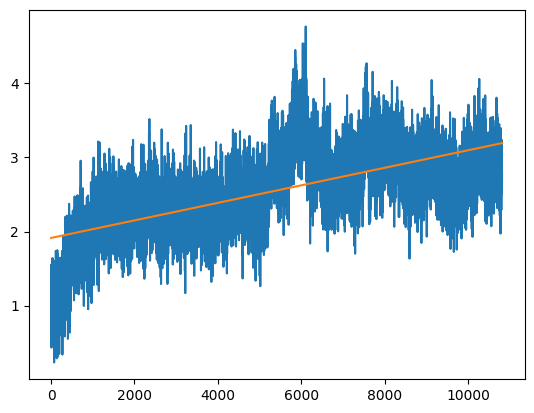

In [362]:


m = LinearRegression()
model = make_pipeline(m)
l = len(df1[height[1]])
x = np.arange(l)
model.fit(x.reshape(-1, 1), df1[height[1]])
x_reg = np.arange(l)
y_reg = model.predict(x_reg.reshape(-1, 1))

print(m.coef_)

plt.plot(df1[height[1]])
plt.plot(x_reg, y_reg)
plt.show()

score 0.7857725389399296
coef 74.12062057182457


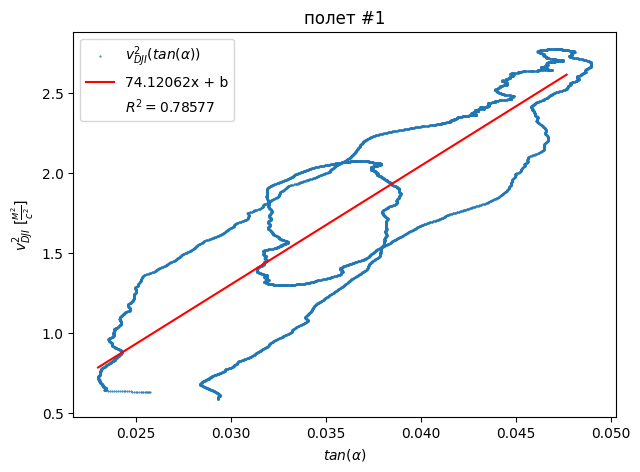

In [363]:
wind_speed = df[wind[0]].to_numpy()**2
psi = np.tan(df[tilt[0]].to_numpy()*np.pi/180)

N = 1800
psi2 = np.convolve(psi, np.ones((N, ))/N, mode='valid')
wind_speed2 = np.convolve(wind_speed, np.ones((N, ))/N, mode='valid')

model = LinearRegression()
reg = model.fit(psi2.reshape(-1, 1), wind_speed2)
print("score", reg.score(psi2.reshape(-1, 1), wind_speed2))
x_reg = np.arange(np.min(psi2), np.max(psi2), (np.max(psi2) - np.min(psi2)) / 20)
y_reg = reg.predict(x_reg.reshape(-1, 1))

print("coef", reg.coef_[0])

fig, ax = plt.subplots(figsize=(7, 5))
ax.set_title(name)
ax.set_xlabel(xlabel=r"$tan(\alpha)$")
ax.set_ylabel(ylabel=r"$v^{2}_{DJI}$ $[\frac{м^{2}}{с^{2}}]$")
ax.scatter(psi2, wind_speed2, marker='.', label=r'$v^{2}_{DJI}(tan(\alpha))$', s=1)
ax.plot(x_reg, y_reg, color='r', label=f'{reg.coef_[0]:.{5}f}x + b')
ax.plot([], [], ' ', label=r"$R^2=$"+f"{reg.score(psi2.reshape(-1, 1), wind_speed2):.{5}f}")
ax.legend()
plt.show()

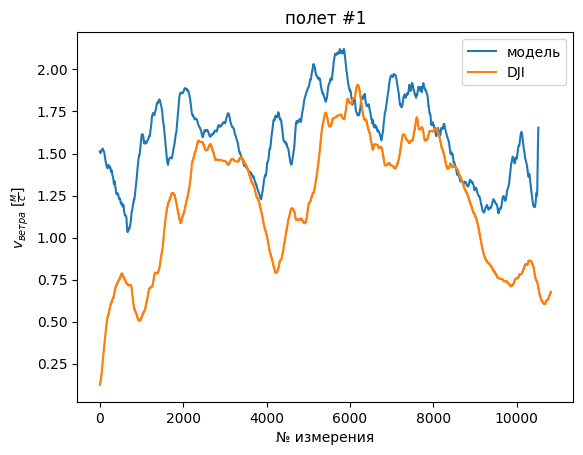

In [364]:
N = 300
v = np.sqrt(reg.coef_*np.convolve(psi, np.ones((N, ))/N, mode='valid')) # бегущее среднее
plt.title(name)
plt.ylabel(r"$v_{ветра}$ [$\frac{м}{с}$]")
plt.xlabel("№ измерения")
plt.plot(v, label='модель')
plt.plot(df[wind[0]], label='DJI')
plt.legend()

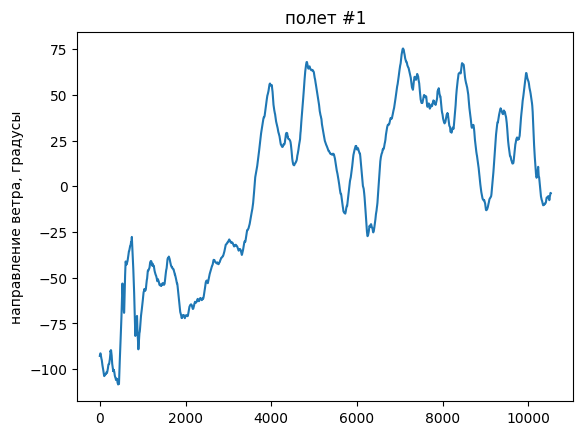

In [365]:
plt.title(name)
plt.ylabel("направление ветра, градусы")
plt.plot(np.convolve(df[tilt[1]].to_numpy(), np.ones((N,))/N, mode='valid'))